In [1]:
import tf_keras
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
model = tf_keras.models.load_model(
    "model/cat_dog_model.h5",
    custom_objects={'KerasLayer': hub.KerasLayer}
)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [3]:
### Predictive Function

def predict_image(image_path, model = model):
    """
    Predict the class of an image using the trained model.
    Args:
        model: The trained model.
        image_path: Path to the image file.
    Returns:
        str: The predicted class label.
    """

    input_img_path = image_path.strip()

    input_img = cv2.imread(input_img_path)

    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))

    input_img_resize = cv2.resize(input_img, (224, 224))

    input_img_scaled = input_img_resize / 255

    image_reshaped = np.reshape(input_img_scaled, [1, 224, 224, 3])

    predictions = model.predict(image_reshaped)

    label = np.argmax(predictions)

    if label == 0:
        print("The image is of Cat")
    else:   
        print("The image is of Dog")

1/1 [==============================] - 1s 1s/step
The image is of Cat


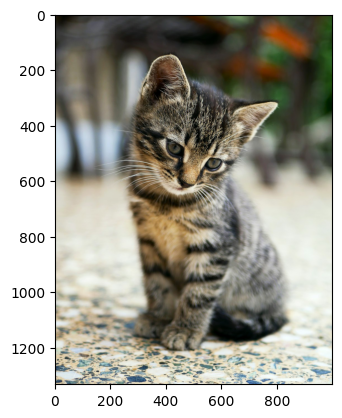

In [4]:
predict_image("test/cat_img.jpg")